## Results and discussions

### Algorithm


There are several factors which can affect the accuracy of this implementation such as walking speeds, the place of the body where phone is kept(such as in pocket, hand or purse) can greatly change the accuracy. The current implementation of this android application tested in Redmi 6 Pro has an accuracy of 95.72% when the phone is in pocket mode. The samples below are collected using matlab.

The below graph shows a sample data collected while normal walking using MATLAB
, which has 30 steps


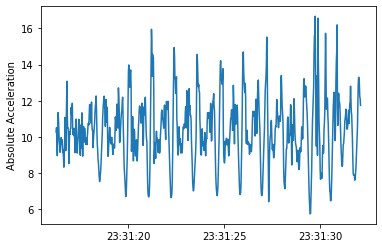

In [2]:
import pandas as pd
import math as math
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt,find_peaks
import time

data = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1nXAgH9uSQlME2qMlnIKbYsQvyNRk060D")
df = pd.DataFrame(data)
df['timestamp']=pd.to_datetime(df['timestamp'])
y=(df['X'].pow(2)+df['Y'].pow(2)+df['Z'].pow(2)).pow(0.5)
x=df['timestamp']

plt.plot(x,y)
plt.ylabel("Absolute Acceleration")
plt.show()

After filtering the graph through the low pass filter:

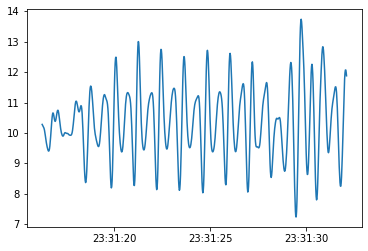

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order, nyq):
  normal_cutoff = cutoff / nyq
  # Get the filter coefficients 
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a, data)
  return y

data_after_low_pass = butter_lowpass_filter(y, 1.5,30,2,15)
plt.plot(data['timestamp'],data_after_low_pass)


#### Testing the cutoff 

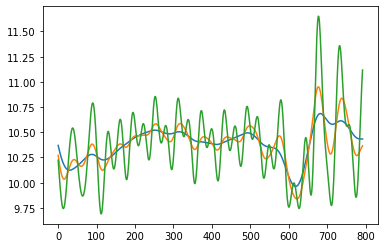

In [8]:
samplingRate = data_after_low_pass.size
for cutoff in [.02, .03, .05]:
    b, a = butter(3, cutoff) # order = 3
    filtered = filtfilt(b, a, data_after_low_pass)
    plt.plot(filtered)
  

Choosing the cutoff to 10.5 which seems to be fairly accurate to choose. After the low pass filter, counting the number of peaks.

In [9]:
data_after_low_pass_series=pd.Series(data_after_low_pass)
new_df = pd.DataFrame({'timestamp':df['timestamp'],'acceleration':data_after_low_pass_series})

new_df['timestamp']=new_df['timestamp'].apply(lambda x: x.value)
c = find_peaks(data_after_low_pass,height=10.25)
c[0].size

28

### Results


The samples were collected in a corridor of a building. I counted real steps in my mind and kept a record in a csv file.

In [10]:
results = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1HUXINVGgar1t1q-a7a6qQSDrXiLsPel7")
rdf = pd.DataFrame(results)

After importing the file with the samples, let us calculate the accuracy of the implementation

In [ ]:
p_error=((rdf['actual'].mean()-rdf['calculated'].mean())/rdf['calculated'].mean())*100
p_accuracy=100-p_error
p_accuracy

95.72649572649573

The sample data shows an accuracy of 95.72%. 